In [154]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
plt.style.use('ggplot')

In [2]:
data = pd.read_csv("C:/Datasets/car_evaluation.csv")

In [3]:
print("Data shape :", data.shape)
data.head(5)

Data shape : (1727, 7)


,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [4]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
data.columns = col_names
print(col_names)

['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']


In [5]:
data.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1727 non-null   object
 1   maint     1727 non-null   object
 2   doors     1727 non-null   object
 3   persons   1727 non-null   object
 4   lug_boot  1727 non-null   object
 5   safety    1727 non-null   object
 6   class     1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


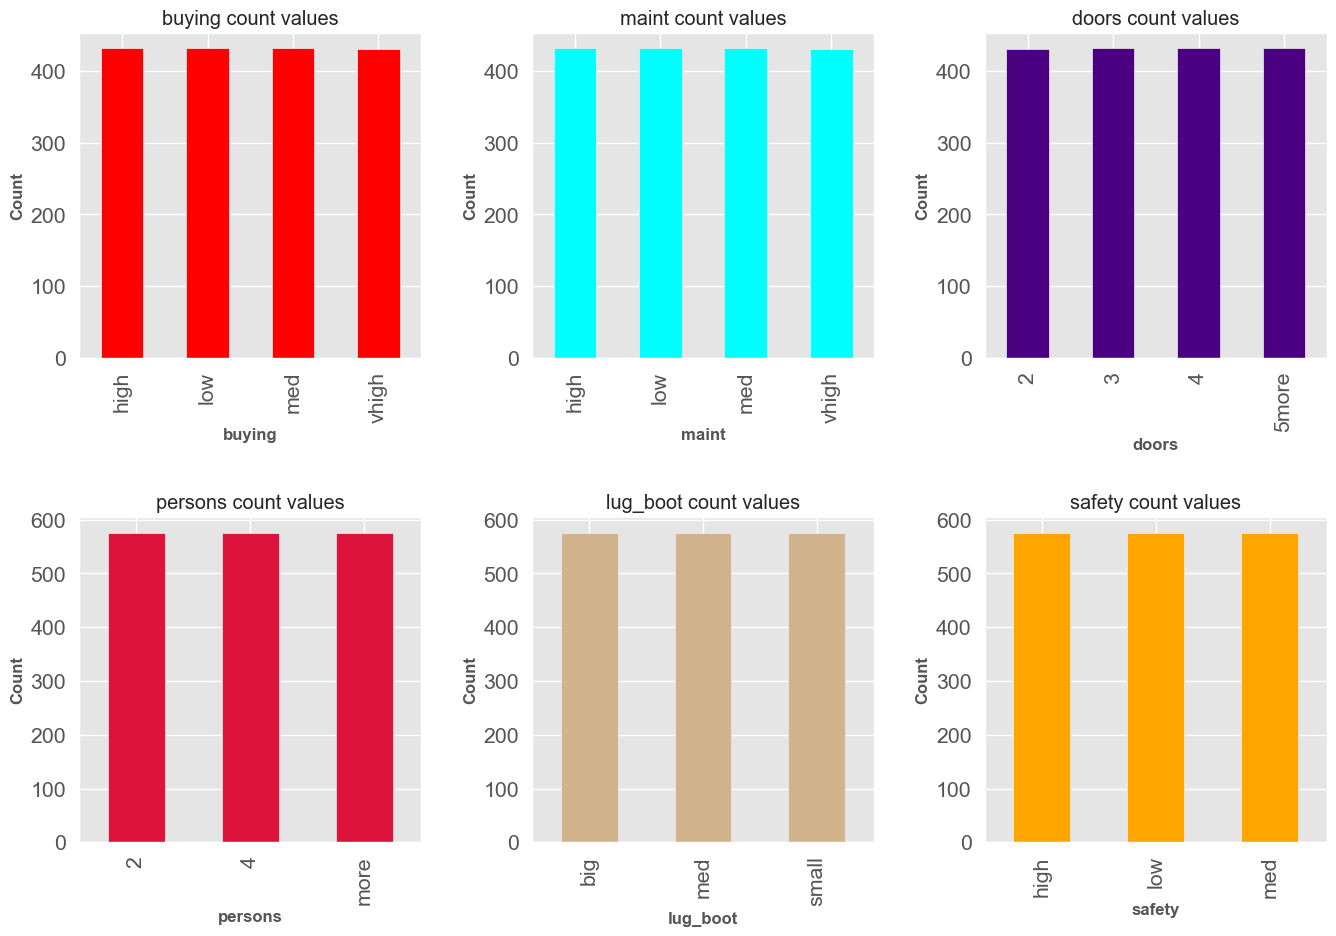

In [100]:
cols = ['buying','maint','doors','persons','lug_boot','safety']
colors = ['red','aqua','indigo','crimson','tan','orange']

fig, axes = plt.subplots(2,3, figsize=(14, 10))
axes = axes.ravel()

for i in range(6):
    data[cols[i]].value_counts().sort_index().plot.bar(ax = axes[i], color = colors[i])
    axes[i].set_title(cols[i] + ' count values' )
    axes[i].set_xlabel(cols[i],weight='bold')
    axes[i].set_ylabel('Count',weight='bold')
    fig.tight_layout(pad = 3)
plt.show()

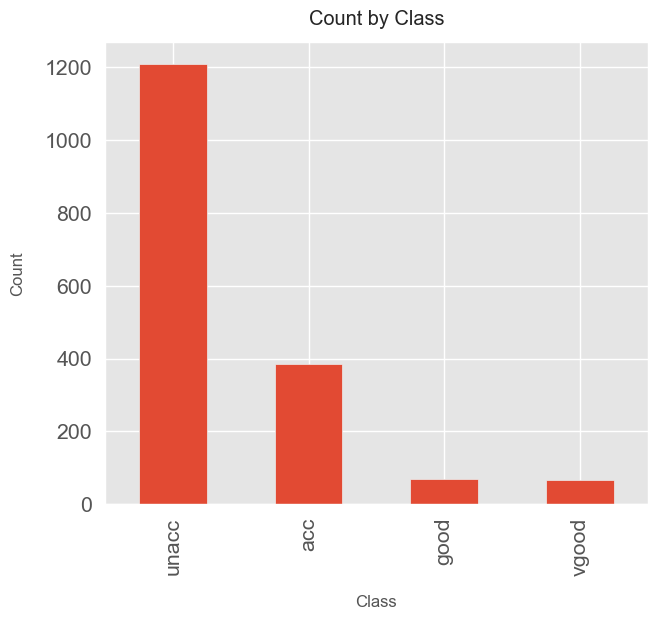

In [42]:
data['class'].value_counts().plot(kind = 'bar', figsize = (7, 6))
plt.xlabel("Class", labelpad = 14)
plt.ylabel("Count", labelpad = 14)
plt.title("Count by Class", y = 1.02)
plt.show()

        Encoding categorial variables using get_dummies

In [109]:
data2 = data.drop("class", axis = 1)
y = data['class']

In [112]:
X = pd.get_dummies(data2)
X.head(5)

,buying_high,buying_low,buying_med,buying_vhigh,maint_high,maint_low,maint_med,maint_vhigh,doors_2,doors_3,...,doors_5more,persons_2,persons_4,persons_more,lug_boot_big,lug_boot_med,lug_boot_small,safety_high,safety_low,safety_med
0,0,0,0,1,0,0,0,1,1,0,...,0,1,0,0,0,0,1,0,0,1
1,0,0,0,1,0,0,0,1,1,0,...,0,1,0,0,0,0,1,1,0,0
2,0,0,0,1,0,0,0,1,1,0,...,0,1,0,0,0,1,0,0,1,0
3,0,0,0,1,0,0,0,1,1,0,...,0,1,0,0,0,1,0,0,0,1
4,0,0,0,1,0,0,0,1,1,0,...,0,1,0,0,0,1,0,1,0,0


In [262]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)
print(X_train.shape)
print(X_test.shape)

(1381, 21)
(346, 21)


In [263]:
RF = RandomForestClassifier(n_estimators = 50, random_state = 0)

RF.fit(X_train, y_train)
y_pred = RF.predict(X_test)

print('Model accuracy score with 30 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with 30 decision-trees : 0.9538


        Encoding categorial variables using LabelEncoder and finding important features

In [247]:
le = LabelEncoder()

data2 = data2.apply(LabelEncoder().fit_transform)
data2.head(5)

,buying,maint,doors,persons,lug_boot,safety
0,3,3,0,0,2,2
1,3,3,0,0,2,0
2,3,3,0,0,1,1
3,3,3,0,0,1,2
4,3,3,0,0,1,0


In [248]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(data2, y, test_size = 0.20)
print(X_train2.shape)
print(X_test2.shape)

(1381, 6)
(346, 6)


In [249]:
RF2 = RandomForestClassifier(n_estimators = 50, random_state = 0)

RF2.fit(X_train2, y_train2)
y_pred2 = RF2.predict(X_test2)

print('Model accuracy score with 30 decision-trees : {0:0.4f}'. format(accuracy_score(y_test2, y_pred2)))

Model accuracy score with 30 decision-trees : 0.9480


In [252]:
feature_scores = pd.Series(RF2.feature_importances_, index=X_train2.columns).sort_values(ascending=False)

feature_scores

safety      0.269187
persons     0.222345
buying      0.210683
maint       0.154757
lug_boot    0.079767
doors       0.063260
dtype: float64

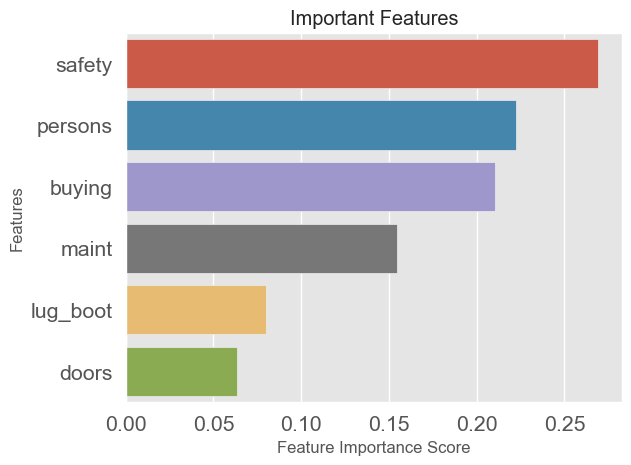

In [253]:
sns.barplot(x=feature_scores, y=feature_scores.index)
plt.title("Important Features")
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.show()

In [254]:
X2 = data2.drop(['doors'], axis = 1)

In [260]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(X2, y, test_size = 0.20)
print(X_train3.shape)
print(X_test3.shape)

(1381, 5)
(346, 5)


In [261]:
RF3 = RandomForestClassifier(n_estimators = 50, random_state = 0)

RF3.fit(X_train3, y_train3)
y_pred3 = RF3.predict(X_test3)

print('Model accuracy score with 30 decision-trees : {0:0.4f}'. format(accuracy_score(y_test3, y_pred3)))

Model accuracy score with 30 decision-trees : 0.9538
